# HOMEWORK 8

In this homework you are going to implement your first machine learning algorithm to automatically binarize document images. The goal of document binarization is to seprate the characters (letters) from everything else. This is the crucial part for automatic document understanding and information extraction from the . In order to do so, you will use the Otsu thresholding algorithm.

At the end of this notebook, there are a couple of questions for you to answer.

In [76]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the document image we will be working on in this homework.

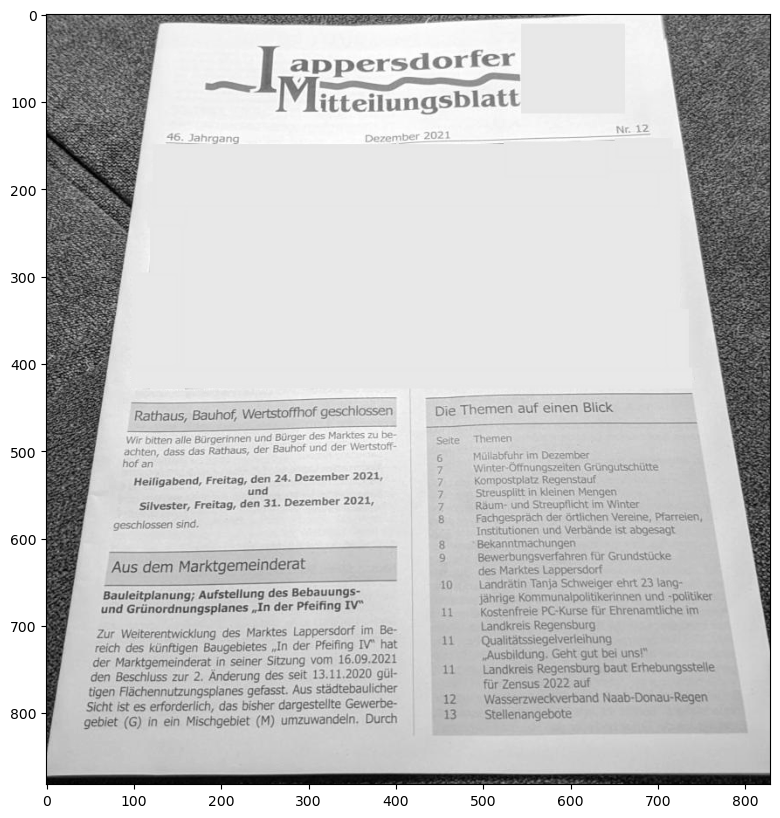

In [77]:
img = cv2.imread('document_cut2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

First, let's have a look at the histogram.

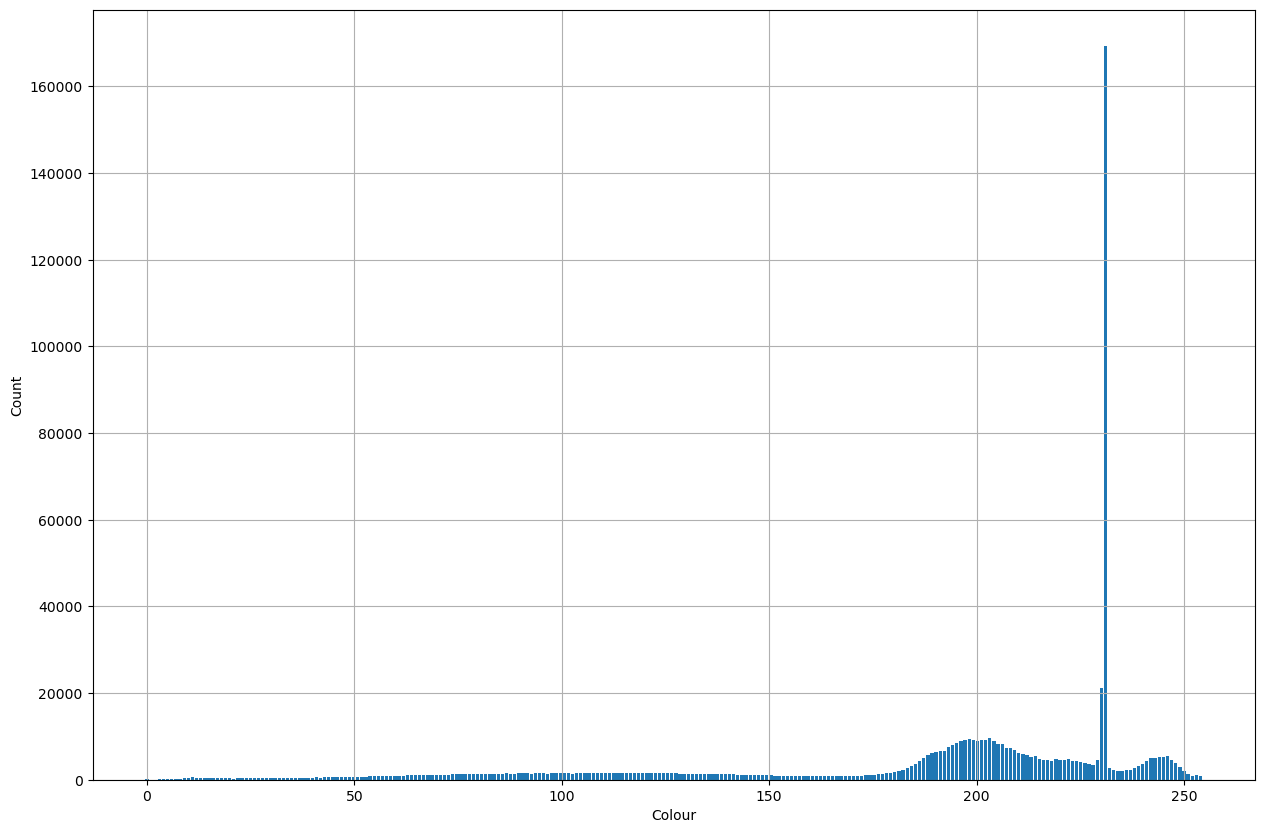

In [78]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

### Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.

In [79]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols
print(num_pixels)

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

background=0
foreground=0

all_colors = img.flatten()   # convert 2d to 1d


#all_colors = img
print(all_colors);
print (all_colors.size)

best_wcv = -1
opt_th = -1

# Brute force search using all possible thresholds (levels of gray)


for th in range(1, 255):
    # Extract the image pixels corresponding to the background
    #background += h[th]
    background = all_colors[all_colors < th]

    # Extract the image pixels corresponding to the foreground
    foreground = all_colors[all_colors >= th]
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue


    # Compute class-weights (omega parameters) for foreground and background
    omega_b = len(background) / num_pixels
    omega_f = len(foreground) / num_pixels

    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    
    sigma_b = np.var(background)
    sigma_f = np.var(foreground)

    # Compute the within-class variance
    wcv = omega_f*sigma_f + omega_b*sigma_b

    # Perform the optimization
    if best_wcv == -1 or best_wcv > wcv:
        best_wcv = wcv
        opt_th = th
        #print("trace:", wcv, th)

        
# Print out the optimal threshold found by Otsu algorithm
#print('Optimal threshold', opt_th)
print('Optimal threshold', opt_th)

731178
[ 87 108 110 ...  11  16  19]
731178
Optimal threshold 157


Finally, let's compare the original image and its thresholded representation.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x170240a0be0>)

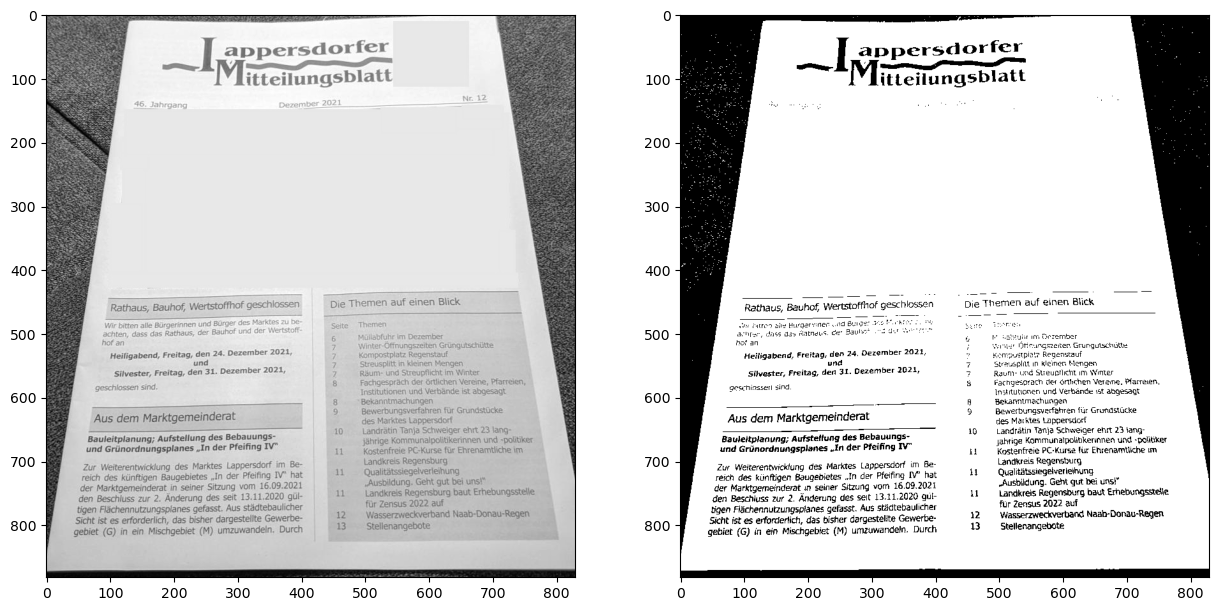

In [80]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

### Questions

* Result: For this type of test, the optimal threshold 157 is slightly different, compared to the result 160 from the previous image. At the moment we can't say if it will result to the better OCR.